In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/ninadaithal/imagesoasis")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhavyasreenimmagadda
Your Kaggle Key: ··········


100%|██████████| 1.23G/1.23G [00:09<00:00, 141MB/s]


Deep CNN

In [ ]:
import numpy as np
import pandas as pd
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import regularizers
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [ ]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Mild Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Moderate Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Non Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Very mild Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))

In [ ]:
import random
non_demented = random.sample(non_demented, 7255)
very_mild_demented = random.sample(very_mild_demented, 7255)

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [ ]:
data = []
label = []
for path in non_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[0]]).toarray())

for path in mild_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[1]]).toarray())

for path in moderate_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[2]]).toarray())

for path in very_mild_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[3]]).toarray())


In [ ]:
data = np.array(data)
label = np.array(label)
label = label.reshape((20000,4))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(
    data,
    label,
    test_size = 0.15,
    shuffle = True,
    random_state = 42,
    stratify = label)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),

    layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
532/532 [==============================] - 16s 26ms/step - loss: 0.0545 - accuracy: 0.9931 - val_loss: 0.0893 - val_accuracy: 0.9853
Epoch 2/50
532/532 [==============================] - 13s 24ms/step - loss: 0.0574 - accuracy: 0.9961 - val_loss: 0.1092 - val_accuracy: 0.9830
Epoch 3/50
532/532 [==============================] - 14s 25ms/step - loss: 0.0760 - accuracy: 0.9948 - val_loss: 0.1122 - val_accuracy: 0.9890
Epoch 4/50
532/532 [==============================] - 13s 24ms/step - loss: 0.0685 - accuracy: 0.9971 - val_loss: 0.1360 - val_accuracy: 0.9807
Epoch 5/50
532/532 [==============================] - 14s 26ms/step - loss: 0.0749 - accuracy: 0.9955 - val_loss: 0.0880 - val_accuracy: 0.9920
Epoch 6/50
532/532 [==============================] - 13s 25ms/step - loss: 0.0741 - accuracy: 0.9956 - val_loss: 0.0897 - val_accuracy: 0.9930
Epoch 7/50
532/532 [==============================] - 14s 25ms/step - loss: 0.0745 - accuracy: 0.9966 - val_loss: 0.0915 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

train_loss, train_acc = model.evaluate(x_train, y_train)
print(f'Train Accuracy: {train_acc:.4f}')
print(f'Train Loss: {train_loss:.4f}')

94/94 [==============================] - 1s 9ms/step - loss: 0.0961 - accuracy: 0.9963
Test Accuracy: 0.9963
Test Loss: 0.0961
532/532 [==============================] - 4s 8ms/step - loss: 0.0859 - accuracy: 0.9991
Train Accuracy: 0.9991
Train Loss: 0.0859


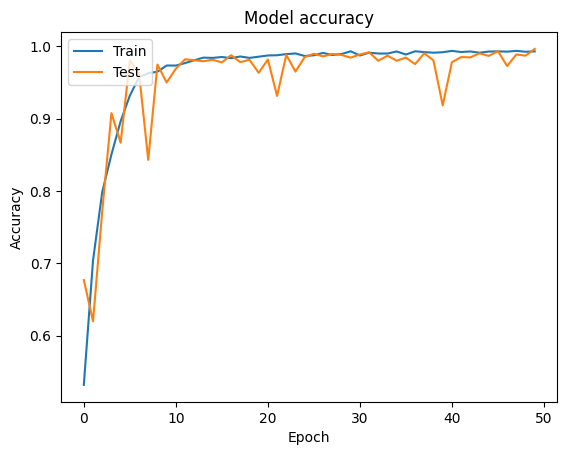

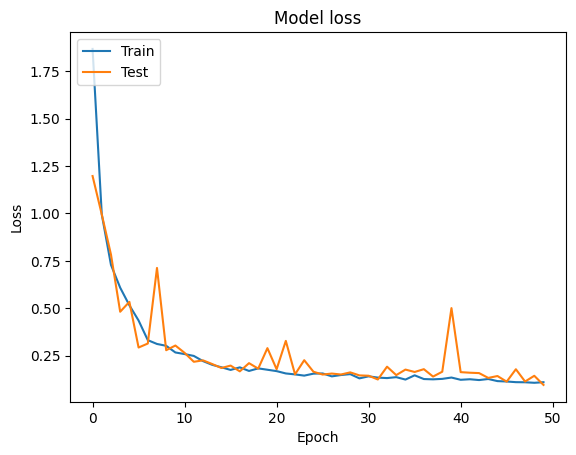

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

94/94 [==============================] - 1s 8ms/step


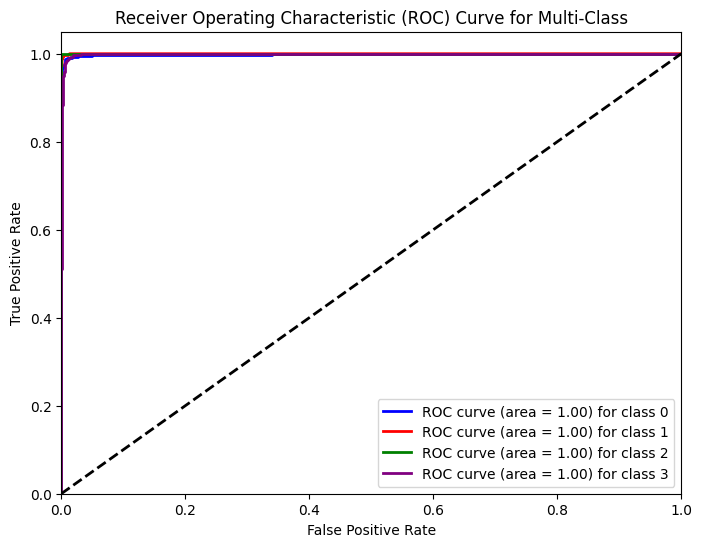

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

y_test_bin = label_binarize(y_test.argmax(axis=1), classes=[0, 1, 2, 3])
y_pred = model.predict(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

colors = cycle(['blue', 'red', 'green', 'purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()


94/94 [==============================] - 1s 8ms/step


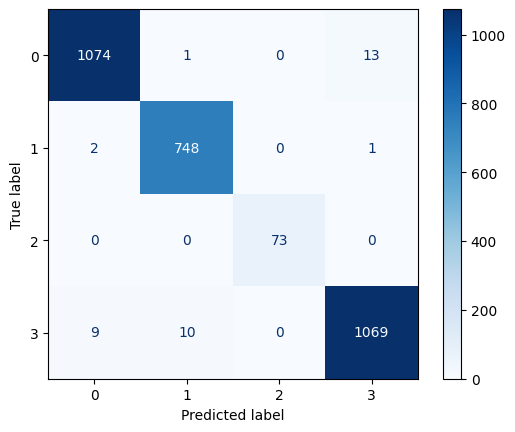

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(x_test)

y_pred_classes = np.argmax(y_pred_probs, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3])
disp.plot(cmap='Blues')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, f1_score

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("Precision:", precision)
print("F1 Score:", f1)

94/94 [==============================] - 1s 6ms/step
Precision: 0.9821595833897391
F1 Score: 0.9817227186892724


In [ ]:
model.save("/content/deep_cnn.h5")

# from google.colab import files
# files.download("/content/deep_cnn.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

def predict_image_class(image_path, model, class_names):
    img = Image.open(image_path)
    img = img.resize((128, 128))
    img_array = np.array(img)

    if img_array.shape == (128, 128, 3):
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class_name = class_names[predicted_class_index]
        return predicted_class_name, prediction, predicted_class_index
    else:
        return "Invalid image shape"

model = load_model('deep_cnn.h5')

class_names = ['Non Demented', 'Mild Dementia', 'Moderate Dementia', 'Very mild Dementia']

image_path_to_predict = '/content/imagesoasis/Data/Non Demented/OAS1_0001_MR1_mpr-1_101.jpg'
predicted_class, prediction_value, prediction_index = predict_image_class(image_path_to_predict, model, class_names)
print(f'The predicted value for the image is: {prediction_value}')
print(f'The predicted index for the image is: {prediction_index}')
print(f'The predicted class for the image is: {predicted_class}')


1/1 [==============================] - 0s 450ms/step
The predicted value for the image is: [[9.9999976e-01 7.8471736e-08 5.2242793e-10 1.1706045e-07]]
The predicted index for the image is: 0
The predicted class for the image is: Non Demented


ResNet50

In [ ]:
import numpy as np
import pandas as pd
import re
import os
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [ ]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Mild Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Moderate Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Non Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Very mild Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))

import random
non_demented = random.sample(non_demented, 7255)
very_mild_demented = random.sample(very_mild_demented, 7255)

encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [ ]:
data = []
label = []
for path in non_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[0]]).toarray())

for path in mild_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[1]]).toarray())

for path in moderate_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[2]]).toarray())

for path in very_mild_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[3]]).toarray())


In [ ]:
data = np.array(data)
label = np.array(label)
label = label.reshape((20000,4))

x_train,x_test,y_train,y_test = train_test_split(
    data,
    label,
    test_size = 0.15,
    shuffle = True,
    random_state = 42,
    stratify = label)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

94765736/94765736 [==============================] - 5s 0us/step


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
532/532 [==============================] - 108s 134ms/step - loss: 0.5644 - accuracy: 0.7791 - val_loss: 0.3133 - val_accuracy: 0.8743
Epoch 2/10
532/532 [==============================] - 68s 128ms/step - loss: 0.1898 - accuracy: 0.9306 - val_loss: 0.1607 - val_accuracy: 0.9383
Epoch 3/10
532/532 [==============================] - 69s 129ms/step - loss: 0.0928 - accuracy: 0.9671 - val_loss: 0.1295 - val_accuracy: 0.9590
Epoch 4/10
532/532 [==============================] - 69s 129ms/step - loss: 0.0698 - accuracy: 0.9764 - val_loss: 0.1272 - val_accuracy: 0.9577
Epoch 5/10
532/532 [==============================] - 71s 133ms/step - loss: 0.0603 - accuracy: 0.9808 - val_loss: 0.1411 - val_accuracy: 0.9570
Epoch 6/10
532/532 [==============================] - 69s 130ms/step - loss: 0.0481 - accuracy: 0.9829 - val_loss: 0.2472 - val_accuracy: 0.9203
Epoch 7/10
532/532 [==============================] - 69s 129ms/step - loss: 0.0515 - accuracy: 0.9826 - val_loss: 0.1366 - val_a

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f'Train Loss: {train_loss:.4f}\nTrain Accuracy: {train_accuracy:.4f}')

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}\nTest Accuracy: {test_accuracy:.4f}')

532/532 [==============================] - 20s 37ms/step - loss: 0.0390 - accuracy: 0.9854
Train Loss: 0.0390
Train Accuracy: 0.9854
94/94 [==============================] - 3s 37ms/step - loss: 0.0731 - accuracy: 0.9750
Test Loss: 0.0731
Test Accuracy: 0.9750


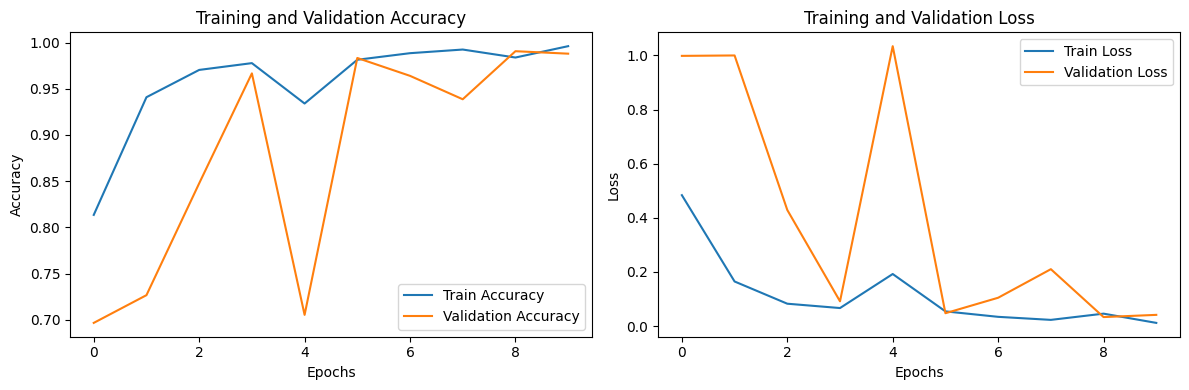

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, f1_score

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("Precision:", precision)
print("F1 Score:", f1)

94/94 [==============================] - 5s 37ms/step
Precision: 0.9753794342858692
F1 Score: 0.9750221655501667


Xception

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [ ]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Mild Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Moderate Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Non Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Very mild Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))

import random
non_demented = random.sample(non_demented, 7255)
very_mild_demented = random.sample(very_mild_demented, 7255)

encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

In [ ]:
data = []
label = []
for path in non_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[0]]).toarray())

for path in mild_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[1]]).toarray())

for path in moderate_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[2]]).toarray())

for path in very_mild_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[3]]).toarray())

In [ ]:
data = np.array(data)
label = np.array(label)
label = label.reshape((20000,4))

x_train,x_test,y_train,y_test = train_test_split(
    data,
    label,
    test_size = 0.15,
    shuffle = True,
    random_state = 42,
    stratify = label)

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

83683744/83683744 [==============================] - 5s 0us/step


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 63, 63, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 63, 63, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 63, 63, 32)           0         ['block1_conv1_bn[0][0]'

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
532/532 [==============================] - 129s 187ms/step - loss: 0.4100 - accuracy: 0.8424 - val_loss: 0.6949 - val_accuracy: 0.8020
Epoch 2/10
532/532 [==============================] - 93s 175ms/step - loss: 0.1123 - accuracy: 0.9595 - val_loss: 0.5494 - val_accuracy: 0.8290
Epoch 3/10
532/532 [==============================] - 93s 174ms/step - loss: 0.0658 - accuracy: 0.9777 - val_loss: 0.2831 - val_accuracy: 0.9187
Epoch 4/10
532/532 [==============================] - 93s 174ms/step - loss: 0.0442 - accuracy: 0.9856 - val_loss: 0.0901 - val_accuracy: 0.9703
Epoch 5/10
532/532 [==============================] - 92s 174ms/step - loss: 0.0338 - accuracy: 0.9888 - val_loss: 1.1107 - val_accuracy: 0.7850
Epoch 6/10
532/532 [==============================] - 94s 177ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.1192 - val_accuracy: 0.9683
Epoch 7/10
532/532 [==============================] - 92s 174ms/step - loss: 0.0473 - accuracy: 0.9837 - val_loss: 0.1008 - val_a

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f'Train Loss: {train_loss:.4f}\nTrain Accuracy: {train_accuracy:.4f}')

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}\nTest Accuracy: {test_accuracy:.4f}')

532/532 [==============================] - 25s 46ms/step - loss: 0.1488 - accuracy: 0.9589
Train Loss: 0.1488
Train Accuracy: 0.9589
94/94 [==============================] - 4s 46ms/step - loss: 0.2556 - accuracy: 0.9393
Test Loss: 0.2556
Test Accuracy: 0.9393


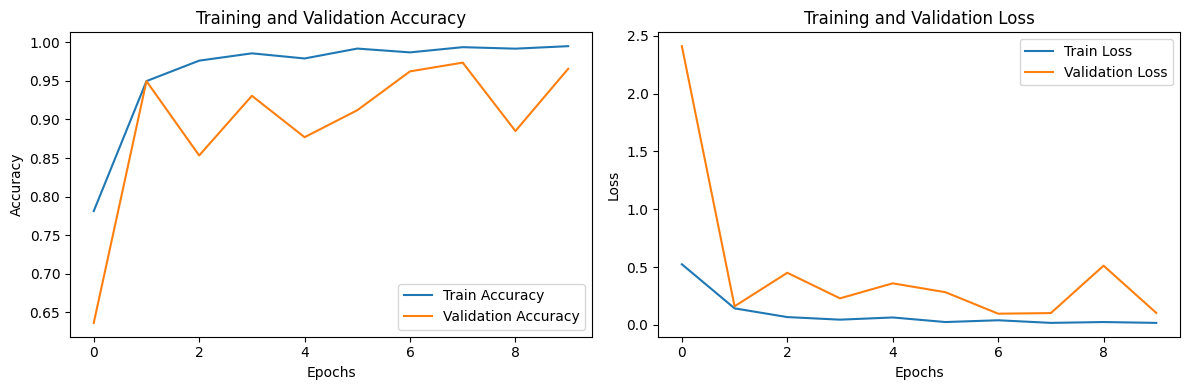

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, f1_score

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("Precision:", precision)
print("F1 Score:", f1)

94/94 [==============================] - 5s 44ms/step
Precision: 0.9446684431687136
F1 Score: 0.9393935911842368


VGG16

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, log_loss
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

In [ ]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Mild Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Moderate Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Non Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/imagesoasis/Data/Very mild Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))

import random
non_demented = random.sample(non_demented, 7255)
very_mild_demented = random.sample(very_mild_demented, 7255)

encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [ ]:
data = []
label = []
for path in non_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[0]]).toarray())

for path in mild_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[1]]).toarray())

for path in moderate_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[2]]).toarray())

for path in very_mild_demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        label.append(encoder.transform([[3]]).toarray())

In [ ]:
data = np.array(data)
label = np.array(label)
label = label.reshape((20000,4))

x_train,x_test,y_train,y_test = train_test_split(
    data,
    label,
    test_size = 0.15,
    shuffle = True,
    random_state = 42,
    stratify = label)

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 3s 0us/step


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
532/532 [==============================] - 98s 158ms/step - loss: 1.3141 - accuracy: 0.3806 - val_loss: 1.1689 - val_accuracy: 0.3947
Epoch 2/10
532/532 [==============================] - 79s 148ms/step - loss: 1.1714 - accuracy: 0.3862 - val_loss: 1.2205 - val_accuracy: 0.2503
Epoch 3/10
532/532 [==============================] - 77s 145ms/step - loss: 1.0701 - accuracy: 0.4709 - val_loss: 0.8622 - val_accuracy: 0.5770
Epoch 4/10
532/532 [==============================] - 77s 144ms/step - loss: 0.8757 - accuracy: 0.5893 - val_loss: 0.7412 - val_accuracy: 0.6690
Epoch 5/10
532/532 [==============================] - 78s 147ms/step - loss: 0.7277 - accuracy: 0.6796 - val_loss: 0.8416 - val_accuracy: 0.6407
Epoch 6/10
532/532 [==============================] - 77s 144ms/step - loss: 0.6432 - accuracy: 0.7364 - val_loss: 0.4564 - val_accuracy: 0.8157
Epoch 7/10
532/532 [==============================] - 78s 147ms/step - loss: 0.4029 - accuracy: 0.8430 - val_loss: 0.3024 - val_ac

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f'Train Loss: {train_loss:.4f}\nTrain Accuracy: {train_accuracy:.4f}')

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}\nTest Accuracy: {test_accuracy:.4f}')

532/532 [==============================] - 22s 41ms/step - loss: 0.1751 - accuracy: 0.9354
Train Loss: 0.1751
Train Accuracy: 0.9354
94/94 [==============================] - 4s 41ms/step - loss: 0.2093 - accuracy: 0.9203
Test Loss: 0.2093
Test Accuracy: 0.9203


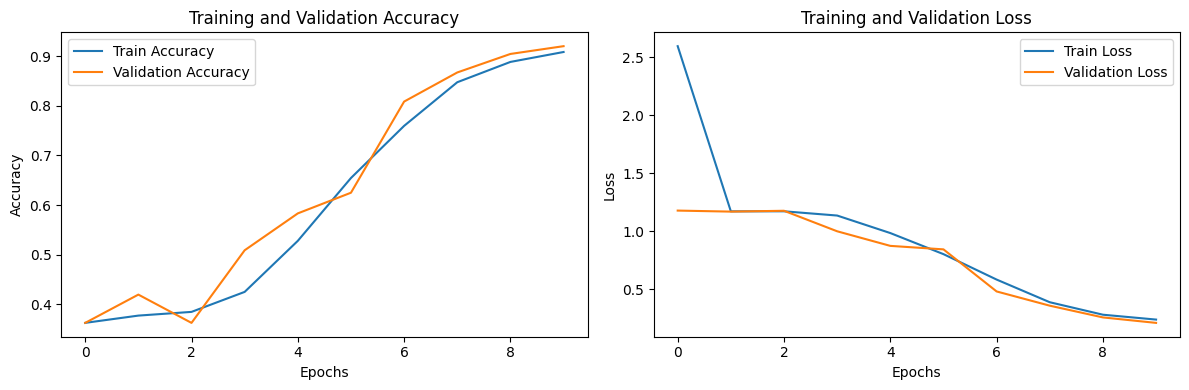

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, f1_score

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("Precision:", precision)
print("F1 Score:", f1)

94/94 [==============================] - 4s 42ms/step
Precision: 0.9239215602719648
F1 Score: 0.9217772045934892


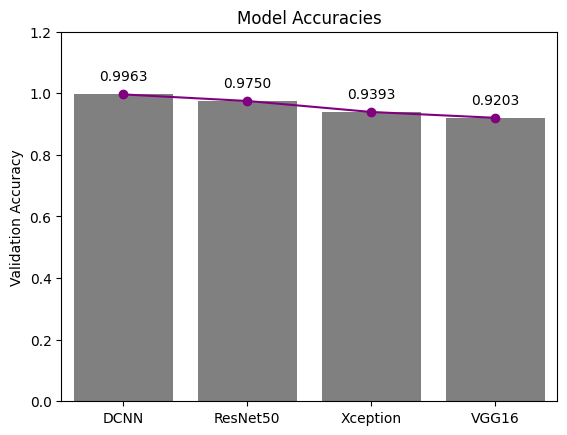

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['DCNN', 'ResNet50', 'Xception', 'VGG16']
accuracies = [0.9963, 0.9750, 0.9393, 0.9203]

plt.bar(model_names, accuracies, color=['grey'])
plt.ylabel('Validation Accuracy')
plt.title('Model Accuracies')

plt.plot(model_names, accuracies, marker='o', linestyle='-', color='purple')

for i, txt in enumerate(accuracies):
    plt.annotate(f'{txt:.4f}', (model_names[i], accuracies[i]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

plt.xlim(left=-0.5, right=len(model_names) - 0.5)
plt.ylim(bottom=0, top=1.2)

plt.show()
